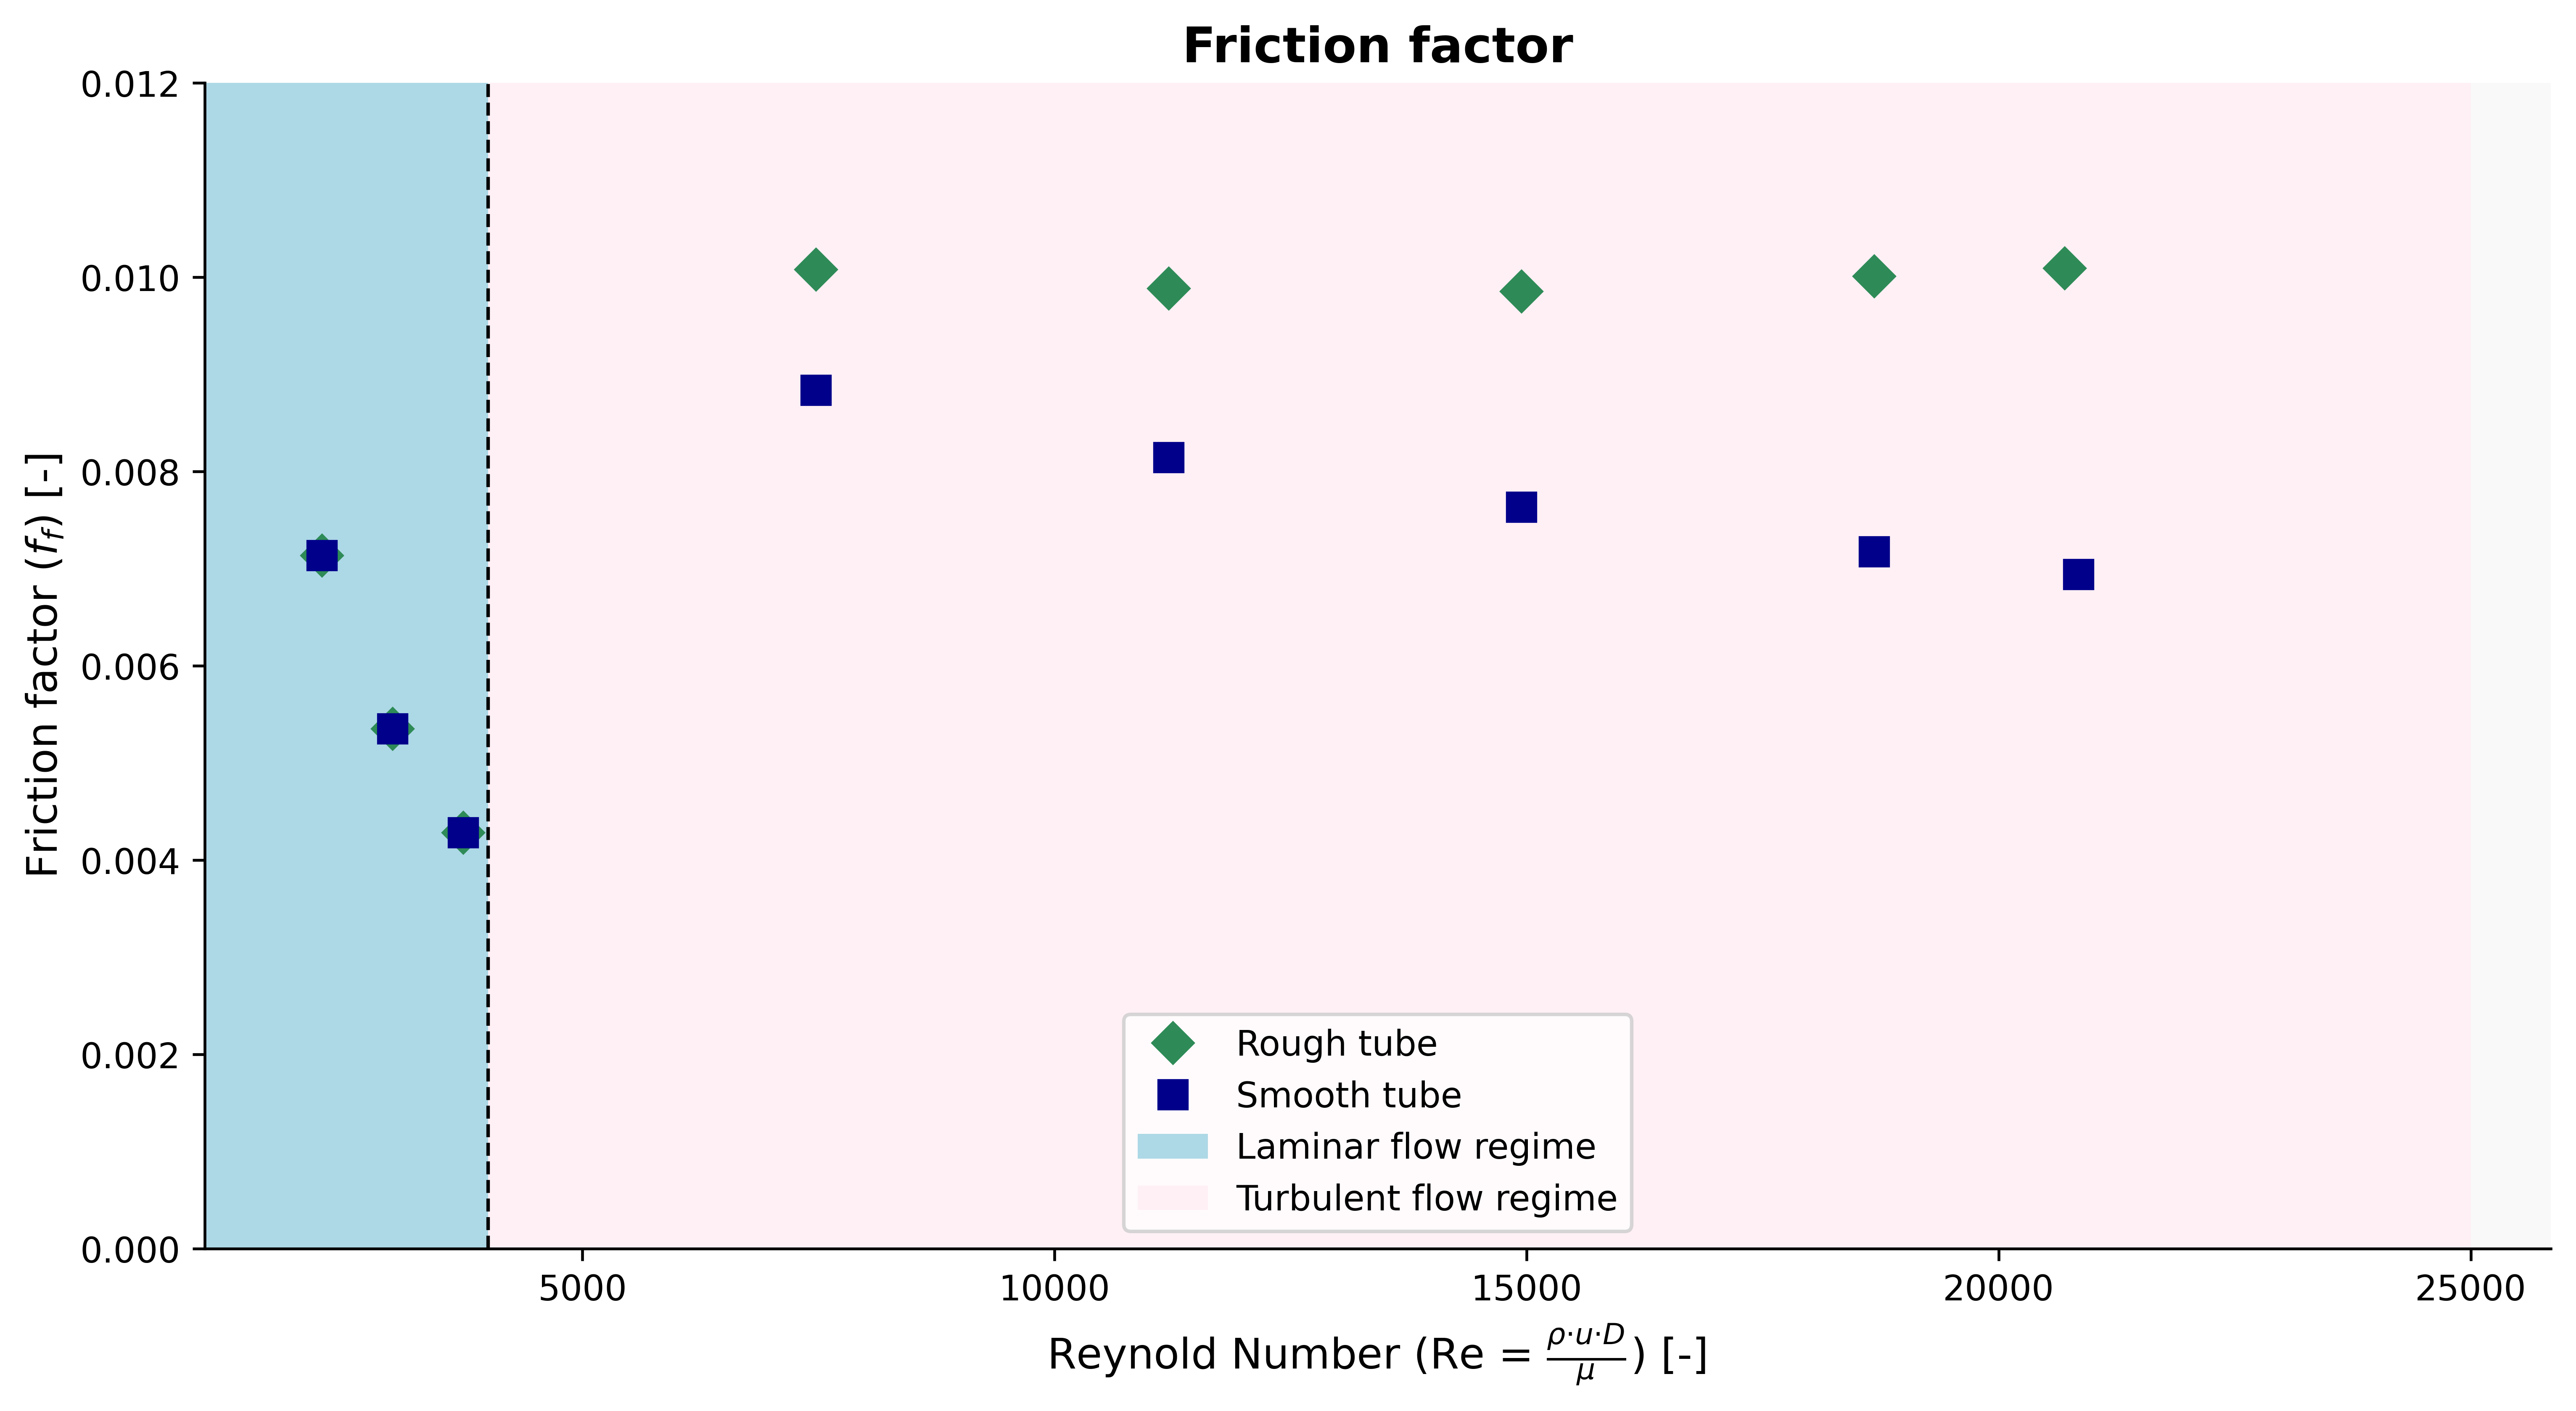

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np


def read_excel_data(file_path):
    df = pd.read_excel(file_path, sheet_name="TUBE 2 et 5", skiprows=1)
    return df

def plot_graph(data_frame):
    
    #Get the data
    x1 = data_frame['Re2'][0:8] #Smooth tube
    y1_tur = data_frame['ff2 (tur)'][0:5]
    y1_lam = data_frame['ff2 (lam)'][5:8]
    y1 = pd.concat([y1_tur, y1_lam])
  
    x2 = data_frame['Re5'][0:8] #Rough tube
    y2_tur = data_frame['ff5 (tur)'][0:5]
    y2_lam = data_frame['ff5 (lam)'][5:8]
    y2 = pd.concat([y2_tur, y2_lam])
    
    plt.figure(figsize=(12, 6), dpi = 600)  # Adjust figure size for better presentation

    # Plot data with specific style elements
    plt.plot(x2, y2, label='Rough tube', color='seagreen', linestyle='', marker='D', markersize=8, linewidth=1.5)
    plt.plot(x1, y1, label='Smooth tube', color='darkblue', linestyle='', marker='s', markersize=8, linewidth=1.5)
    
    
    plt.xlabel(r'Reynold Number (Re = $\frac{ρ⋅u⋅D}{µ}$) [-] ', fontsize=12)
    plt.ylabel('Friction factor ($f_{f}$) [-]', fontsize=12)
    plt.title('Friction factor', fontsize=14, weight='bold')

    # Put logarithmic scales
    #plt.xscale('log')  # Set the x-axis scale to logarithmic
    
    plt.grid(False)

    # Add a subtle background color
    plt.gca().set_facecolor('#f9f9f9')

    # Remove spines for cleaner appearance
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Separate figure in two parts
    sep=4000 # At Re = 4000 flow regime changes from laminar to turbulent
    plt.axvline(sep, color='black', linestyle='--', linewidth=1)  # Vertical line at the end of the first part
    plt.axvspan(1000, sep, facecolor='lightblue', label= "Laminar flow regime")  # Light blue background for the first part
    plt.axvspan(sep, 25000, facecolor='lavenderblush', label= "Turbulent flow regime")  # Light yellow background for the second part
    
    # Set x-axis and y-axis limits
    plt.xlim(1000, max(max(x1),max(x2))+5000)
    plt.ylim(0, 0.012)
    
    plt.legend(loc='lower center')
   
    
def save_svg(file_path):
    plt.savefig(file_path + ".png", format='png')  # Save as a PNG file for matplotlib

def main():
    excel_file_path = r"C:/Users/nilst/Documents/EPFL/BA_4/TP_ENG/TP-2_Q/TUBES.xlsx"
    download_folder =r"C:/Users/nilst/Documents/EPFL/BA_4/TP_ENG/TP-2_Q/"

    # Read data from Excel file
    data = read_excel_data(excel_file_path)

    # Plot the graph
    plot_graph(data)
    
    # Save the graph and download it
    svg_file_path = os.path.join(download_folder, 'graph_friction')
    save_svg(svg_file_path)
    
    plt.show()

if __name__ == "__main__":
    main()
